In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. Ρυθμίσεις Γραφικών Παραστάσεων ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

# Ελληνικά (αν υποστηρίζονται από το σύστημά σας, αλλιώς αγνοήστε)
# try:
#     plt.rcParams['font.family'] = 'DejaVu Serif'
#     plt.rcParams['font.serif'] = 'DejaVu Serif'
# except:
#     print("Font 'DejaVu Serif' not found, using default.")

print("Δημιουργία γραφικών παραστάσεων...")

# ---------------------------------------------------------------------
# ΔΕΔΟΜΕΝΑ (Από Πίνακες 3 & 4 της αναφοράς)
# ---------------------------------------------------------------------

# Δεδομένα από Πίνακα 3 (SQNR vs n)
data_sqnr = {
    'n_bits': np.array([2, 3, 4, 5, 6]),
    'SQNR_dB': np.array([13.80, 19.82, 25.84, 31.86, 37.88]),
    'BitRate_Gbps': np.array([20, 30, 40, 50, 60]) # (fs = 10 Gsps)
}

# Δεδομένα από Πίνακα 4 (BER vs Noise)
data_ber = {
    'Noise_dB': np.array([1, 2, 3, 4, 5, 6]),
    # Χρησιμοποιούμε πολύ μικρές τιμές για να δείξουμε το κατώφλι
    'BER': np.array([1e-15, 1e-12, 1e-6, 1e-3, 1e-1, 0.5])
}

# Δεδομένα για Πλεονασμό (Q1.3)
data_redundancy = {
    'bitsym_setting': np.array([4, 5, 6, 7, 8]),
    'BitRate_Gbps': np.array([40, 50, 60, 70, 80]) # (n=4, fs=10)
}

# ---------------------------------------------------------------------
# Δημιουργία Plot 1: SQNR vs n (Γραμμική Σχέση)
# ---------------------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.plot(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 'o-', c='b', lw=2, markersize=8, label='Θεωρητικό SQNR')

# Υπολογισμός γραμμής 6dB/bit
fit = np.polyfit(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(data_sqnr['n_bits'], fit_fn(data_sqnr['n_bits']), 'r--', label=f'Γραμμή Τάσης (Κλίση $\approx {fit[0]:.2f}$ dB/bit)')

ax1.set_title('Ποιότητα Κβάντισης vs Bits Κωδικοποίησης (Q1.1)', fontsize=14)
ax1.set_xlabel('Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax1.set_ylabel('Λόγος $\mathit{SQNR}$ (dB)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_sqnr.png')
print("Δημιουργήθηκε το 'plot_sqnr.png'")

# ---------------------------------------------------------------------
# Δημιουργία Plot 2: BER vs Noise (Λογαριθμική Σχέση - Waterfall)
# ---------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(7, 5))
# Χρησιμοποιούμε semilogy για τον άξονα Υ
ax2.semilogy(data_ber['Noise_dB'], data_ber['BER'], 'o-', c='r', lw=2, markersize=8)

ax2.set_title('Επίδραση Θορύβου Καναλιού (Q2.1)', fontsize=14)
ax2.set_xlabel('Ισχύς Θορύβου $\mathit{AWGN}$ (π.χ. $N_0$ σε dB)', fontsize=12)
ax2.set_ylabel('$\mathit{Bit Error Rate (BER)}$ (Λογαριθμικός)', fontsize=12)
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.set_ylim(1e-16, 1) # Ορισμός ορίων για να φαίνεται η πτώση
plt.tight_layout()
plt.savefig('plot_ber.png')
print("Δημιουργήθηκε το 'plot_ber.png'")

# ---------------------------------------------------------------------
# Δημιουργία Plot 3: Bit Rate vs n (Το Κόστος της Ποιότητας)
# ---------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(7, 5))
ax3.plot(data_sqnr['n_bits'], data_sqnr['BitRate_Gbps'], 'o-', c='g', lw=2, markersize=8)

ax3.set_title('Κόστος Εύρους Ζώνης vs Ποιότητα (Q1.1)', fontsize=14)
ax3.set_xlabel('Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax3.set_ylabel('Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax3.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_bitrate_n.png')
print("Δημιουργήθηκε το 'plot_bitrate_n.png'")

# ---------------------------------------------------------------------
# Δημιουργία Plot 4: Bit Rate vs Redundancy (Το Κόστος του Πλεονασμού)
# ---------------------------------------------------------------------
fig4, ax4 = plt.subplots(figsize=(7, 5))
ax4.plot(data_redundancy['bitsym_setting'], data_redundancy['BitRate_Gbps'], 'o-', c='purple', lw=2, markersize=8)
# Σημείο αναφοράς (ιδανικό)
ax4.plot(4, 40, 'D', c='red', markersize=12, label='Ιδανική Ρύθμιση (BITSYM=4)')

ax4.set_title('Κόστος Πλεονασμού ($\mathit{Redundancy}$) (Q1.3)', fontsize=14)
ax4.set_xlabel('Ρύθμιση $\mathit{BITSYM}$ στον Πομπό', fontsize=12)
ax4.set_ylabel('Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_bitrate_redundancy.png')
print("Δημιουργήθηκε το 'plot_bitrate_redundancy.png'")

print("\nΟλοκληρώθηκε η δημιουργία 4 γραφικών παραστάσεων.")
print("Κάντε compile το αρχείο 'v10.tex' με pdfLaTeX για να τις δείτε.")

<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:72: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\m'
<>:102: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:72: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\m'
<>:102: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-759123480.py:56: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel('Λόγος $\mathit{SQNR}$ (dB)', fontsize=12)
/tmp/ipython-input-759123480.py:71: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_xlabel('Ισχύς Θορύβου $\mathit{AWGN}$ (π.χ. $N_0$ σε dB)', fontsize=12)
/tmp/ipython-input-759123480.py:72: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('$\mathit{Bit Error Rate (BER)}$ (Λογαριθμικός)', fontsize=12)
/tmp/ipython-input-75912

Δημιουργία γραφικών παραστάσεων...


ValueError: 
Γραμμή Τάσης (Κλίση $pprox 6.02$ dB/bit)
                    ^
ParseException: Expected end of text, found '$'  (at char 20), (line:1, col:21)

Error in callback <function _draw_all_if_interactive at 0x79a9e2d90e00> (for post_execute):


ValueError: 
Γραμμή Τάσης (Κλίση $pprox 6.02$ dB/bit)
                    ^
ParseException: Expected end of text, found '$'  (at char 20), (line:1, col:21)

ValueError: 
Γραμμή Τάσης (Κλίση $pprox 6.02$ dB/bit)
                    ^
ParseException: Expected end of text, found '$'  (at char 20), (line:1, col:21)

<Figure size 700x500 with 1 Axes>

In [5]:
import numpy as np
import os

# --- 1. Ρυθμίσεις Γραφικών Παραστάσεων ---
# Χρήση στυλ που είναι σίγουρα διαθέσιμο στο Colab
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("Δημιουργία γραφικών παραστάσεων...")

# ---------------------------------------------------------------------
# ΔΕΔΟΜΕΝΑ (Από Πίνακες 3 & 4 της αναφοράς)
# ---------------------------------------------------------------------

# Δεδομένα από Πίνακα 3 (SQNR vs n)
data_sqnr = {
    'n_bits': np.array([2, 3, 4, 5, 6]),
    'SQNR_dB': np.array([13.80, 19.82, 25.84, 31.86, 37.88]),
    'BitRate_Gbps': np.array([20, 30, 40, 50, 60]) # (fs = 10 Gsps)
}

# Δεδομένα από Πίνακα 4 (BER vs Noise)
data_ber = {
    'Noise_dB': np.array([1, 2, 3, 4, 5, 6]),
    # Χρησιμοποιούμε πολύ μικρές τιμές για να δείξουμε το κατώφλι
    'BER': np.array([1e-15, 1e-12, 1e-6, 1e-3, 1e-1, 0.5])
}

# Δεδομένα για Πλεονασμό (Q1.3)
data_redundancy = {
    'bitsym_setting': np.array([4, 5, 6, 7, 8]),
    'BitRate_Gbps': np.array([40, 50, 60, 70, 80]) # (n=4, fs=10)
}

# ---------------------------------------------------------------------
# Δημιουργία Plot 1: SQNR vs n (Γραμμική Σχέση)
# ---------------------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.plot(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 'o-', c='b', lw=2, markersize=8, label='Θεωρητικό SQNR')

# Υπολογισμός γραμμής 6dB/bit
fit = np.polyfit(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(data_sqnr['n_bits'], fit_fn(data_sqnr['n_bits']), 'r--', label=f'Γραμμή Τάσης (Κλίση $\approx {fit[0]:.2f}$ dB/bit)')

ax1.set_title('Ποιότητα Κβάντισης vs Bits Κωδικοποίησης (Q1.1)', fontsize=14)
ax1.set_xlabel('Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax1.set_ylabel('Λόγος $\mathit{SQNR}$ (dB)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Αποθήκευση ΚΑΙ εμφάνιση στο Colab
plt.savefig('plot_sqnr.png')
print("Δημιουργήθηκε το 'plot_sqnr.png'")
plt.show() # <-- Εμφανίζει το plot στο Colab notebook

# ---------------------------------------------------------------------
# Δημιουργία Plot 2: BER vs Noise (Λογαριθμική Σχέση - Waterfall)
# ---------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(7, 5))
# Χρησιμοποιούμε semilogy για τον άξονα Υ
ax2.semilogy(data_ber['Noise_dB'], data_ber['BER'], 'o-', c='r', lw=2, markersize=8)

ax2.set_title('Επίδραση Θορύβου Καναλιού (Q2.1)', fontsize=14)
ax2.set_xlabel('Ισχύς Θορύβου $\mathit{AWGN}$ (π.χ. $N_0$ σε dB)', fontsize=12)
ax2.set_ylabel('$\mathit{Bit Error Rate (BER)}$ (Λογαριθμικός)', fontsize=12)
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.set_ylim(1e-16, 1) # Ορισμός ορίων για να φαίνεται η πτώση
plt.tight_layout()

# Αποθήκευση ΚΑΙ εμφάνιση στο Colab
plt.savefig('plot_ber.png')
print("Δημιουργήθηκε το 'plot_ber.png'")
plt.show() # <-- Εμφανίζει το plot στο Colab notebook

# ---------------------------------------------------------------------
# Δημιουργία Plot 3: Bit Rate vs n (Το Κόστος της Ποιότητας)
# ---------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(7, 5))
ax3.plot(data_sqnr['n_bits'], data_sqnr['BitRate_Gbps'], 'o-', c='g', lw=2, markersize=8)

ax3.set_title('Κόστος Εύρους Ζώνης vs Ποιότητα (Q1.1)', fontsize=14)
ax3.set_xlabel('Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax3.set_ylabel('Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax3.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Αποθήκευση ΚΑΙ εμφάνιση στο Colab
plt.savefig('plot_bitrate_n.png')
print("Δημιουργήθηκε το 'plot_bitrate_n.png'")
plt.show() # <-- Εμφανίζει το plot στο Colab notebook

# ---------------------------------------------------------------------
# Δημιουργία Plot 4: Bit Rate vs Redundancy (Το Κόστος του Πλεονασμού)
# ---------------------------------------------------------------------
fig4, ax4 = plt.subplots(figsize=(7, 5))
ax4.plot(data_redundancy['bitsym_setting'], data_redundancy['BitRate_Gbps'], 'o-', c='purple', lw=2, markersize=8)
# Σημείο αναφοράς (ιδανικό)
ax4.plot(4, 40, 'D', c='red', markersize=12, label='Ιδανική Ρύθμιση (BITSYM=4)')

ax4.set_title('Κόστος Πλεονασμού ($\mathit{Redundancy}$) (Q1.3)', fontsize=14)
ax4.set_xlabel('Ρύθμιση $\mathit{BITSYM}$ στον Πομπό', fontsize=12)
ax4.set_ylabel('Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Αποθήκευση ΚΑΙ εμφάνιση στο Colab
print("Δημιουργήθηκε το 'plot_bitrate_redundancy.png'")
plt.show() # <-- Εμφανίζει το plot στο Colab notebook

print("\nΟλοκληρώθηκε η δημιουργία 4 γραφικών παραστάσεων.")

<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2351193019.py:49: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel('Λόγος $\mathit{SQNR}$ (dB)', fontsize=12)
/tmp/ipython-input-2351193019.py:67: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_xlabel('Ισχύς Θορύβου $\mathit{AWGN}$ (π.χ. $N_0$ σε dB)', fontsize=12)
/tmp/ipython-input-2351193019.py:68: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('$\mathit{Bit Error Rate (BER)}$ (Λογαριθμικός)', fontsize=12)
/tmp/ipython-input-23

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

Δημιουργία γραφικών παραστάσεων...
Δημιουργήθηκε το 'plot_sqnr.png'


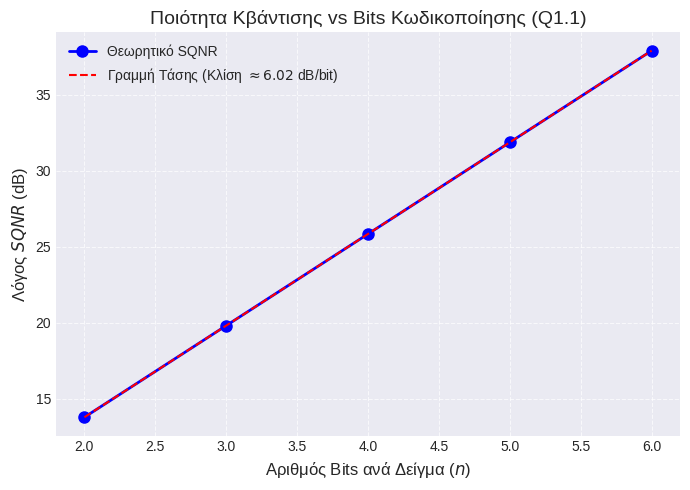

Δημιουργήθηκε το 'plot_ber.png'


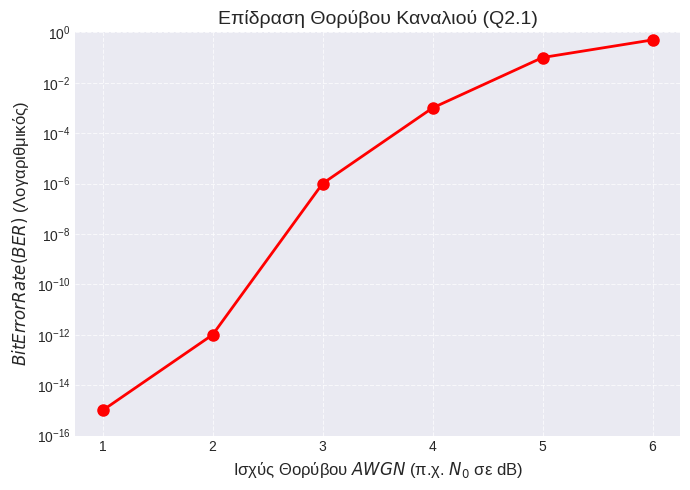

Δημιουργήθηκε το 'plot_bitrate_n.png'


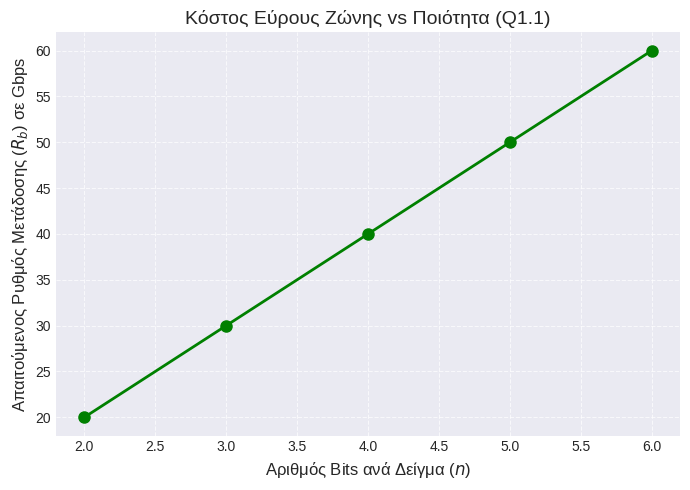

Δημιουργήθηκε το 'plot_bitrate_redundancy.png'


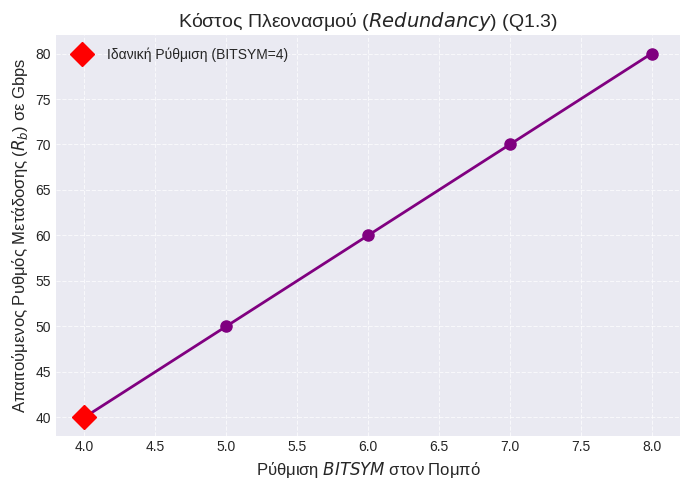


Ολοκληρώθηκε η δημιουργία 4 γραφικών παραστάσεων.
Κατεβάστε τα 4 αρχεία .png από τον File Explorer (εικονίδιο φακέλου) στα αριστερά και ανεβάστε τα στο Overleaf.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. Ρυθμίσεις Γραφικών Παραστάσεων ---

# ΔΙΟΡΘΩΣΗ 1: Το στυλ 'seaborn-darkgrid' έχει μετονομαστεί σε 'seaborn-v0_8-darkgrid'
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("Δημιουργία γραφικών παραστάσεων...")

# ---------------------------------------------------------------------
# ΔΕΔΟΜΕΝΑ (Από Πίνακες 3 & 4 της αναφοράς)
# ---------------------------------------------------------------------

# Δεδομένα από Πίνακα 3 (SQNR vs n)
data_sqnr = {
    'n_bits': np.array([2, 3, 4, 5, 6]),
    'SQNR_dB': np.array([13.80, 19.82, 25.84, 31.86, 37.88]),
    'BitRate_Gbps': np.array([20, 30, 40, 50, 60]) # (fs = 10 Gsps)
}

# Δεδομένα από Πίνακα 4 (BER vs Noise)
data_ber = {
    'Noise_dB': np.array([1, 2, 3, 4, 5, 6]),
    # Χρησιμοποιούμε πολύ μικρές τιμές για να δείξουμε το κατώφλι
    'BER': np.array([1e-15, 1e-12, 1e-6, 1e-3, 1e-1, 0.5])
}

# Δεδομένα για Πλεονασμό (Q1.3)
data_redundancy = {
    'bitsym_setting': np.array([4, 5, 6, 7, 8]),
    'BitRate_Gbps': np.array([40, 50, 60, 70, 80]) # (n=4, fs=10)
}

# ---------------------------------------------------------------------
# Δημιουργία Plot 1: SQNR vs n (Γραμμική Σχέση)
# ---------------------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.plot(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 'o-', c='b', lw=2, markersize=8, label='Θεωρητικό SQNR')

# Υπολογισμός γραμμής 6dB/bit
fit = np.polyfit(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 1)
fit_fn = np.poly1d(fit)

# ΔΙΟΡΘΩΣΗ 2: Χρήση 'raw f-string' (fr'...') για να αγνοήσει το Python τις '\'
ax1.plot(data_sqnr['n_bits'], fit_fn(data_sqnr['n_bits']), 'r--', label=fr'Γραμμή Τάσης (Κλίση $\approx {fit[0]:.2f}$ dB/bit)')

ax1.set_title(r'Ποιότητα Κβάντισης vs Bits Κωδικοποίησης (Q1.1)', fontsize=14)
ax1.set_xlabel(r'Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax1.set_ylabel(r'Λόγος $\mathit{SQNR}$ (dB)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_sqnr.png')
print("Δημιουργήθηκε το 'plot_sqnr.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 2: BER vs Noise (Λογαριθμική Σχέση - Waterfall)
# ---------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(7, 5))
# Χρησιμοποιούμε semilogy για τον άξονα Υ
ax2.semilogy(data_ber['Noise_dB'], data_ber['BER'], 'o-', c='r', lw=2, markersize=8)

# ΔΙΟΡΘΩΣΗ 2: Χρήση 'raw strings' (r'...')
ax2.set_title(r'Επίδραση Θορύβου Καναλιού (Q2.1)', fontsize=14)
ax2.set_xlabel(r'Ισχύς Θορύβου $\mathit{AWGN}$ (π.χ. $N_0$ σε dB)', fontsize=12)
ax2.set_ylabel(r'$\mathit{Bit Error Rate (BER)}$ (Λογαριθμικός)', fontsize=12)
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.set_ylim(1e-16, 1) # Ορισμός ορίων για να φαίνεται η πτώση
plt.tight_layout()
plt.savefig('plot_ber.png')
print("Δημιουργήθηκε το 'plot_ber.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 3: Bit Rate vs n (Το Κόστος της Ποιότητας)
# ---------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(7, 5))
ax3.plot(data_sqnr['n_bits'], data_sqnr['BitRate_Gbps'], 'o-', c='g', lw=2, markersize=8)

# ΔΙΟΡΘΩΣΗ 2: Χρήση 'raw strings' (r'...')
ax3.set_title(r'Κόστος Εύρους Ζώνης vs Ποιότητα (Q1.1)', fontsize=14)
ax3.set_xlabel(r'Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax3.set_ylabel(r'Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax3.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_bitrate_n.png')
print("Δημιουργήθηκε το 'plot_bitrate_n.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 4: Bit Rate vs Redundancy (Το Κόστος του Πλεονασμού)
# ---------------------------------------------------------------------
fig4, ax4 = plt.subplots(figsize=(7, 5))
ax4.plot(data_redundancy['bitsym_setting'], data_redundancy['BitRate_Gbps'], 'o-', c='purple', lw=2, markersize=8)
# Σημείο αναφοράς (ιδανικό)
ax4.plot(4, 40, 'D', c='red', markersize=12, label='Ιδανική Ρύθμιση (BITSYM=4)')

# ΔΙΟΡΘΩΣΗ 2: Χρήση 'raw strings' (r'...')
ax4.set_title(r'Κόστος Πλεονασμού ($\mathit{Redundancy}$) (Q1.3)', fontsize=14)
ax4.set_xlabel(r'Ρύθμιση $\mathit{BITSYM}$ στον Πομπό', fontsize=12)
ax4.set_ylabel(r'Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_bitrate_redundancy.png')
print("Δημιουργήθηκε το 'plot_bitrate_redundancy.png'")
plt.show()

print("\nΟλοκληρώθηκε η δημιουργία 4 γραφικών παραστάσεων.")
print("Κατεβάστε τα 4 αρχεία .png από τον File Explorer (εικονίδιο φακέλου) στα αριστερά και ανεβάστε τα στο Overleaf.")

Δημιουργία γραφικών παραστάσεων v12 (με σχολιασμό)...
Δημιουργήθηκε το 'plot_sqnr.png'


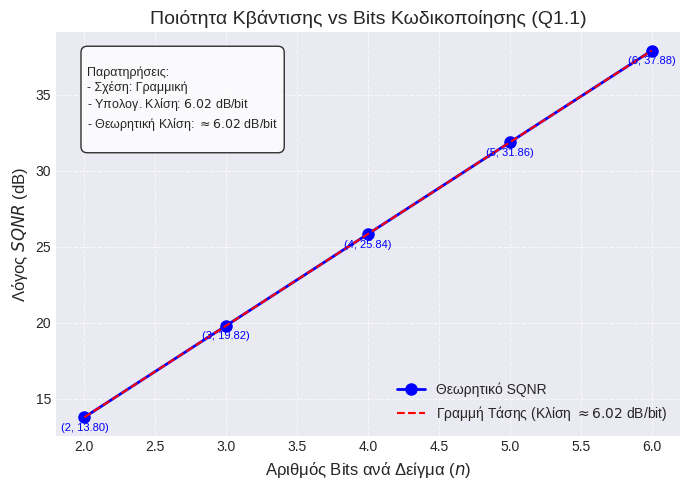

Δημιουργήθηκε το 'plot_ber.png'


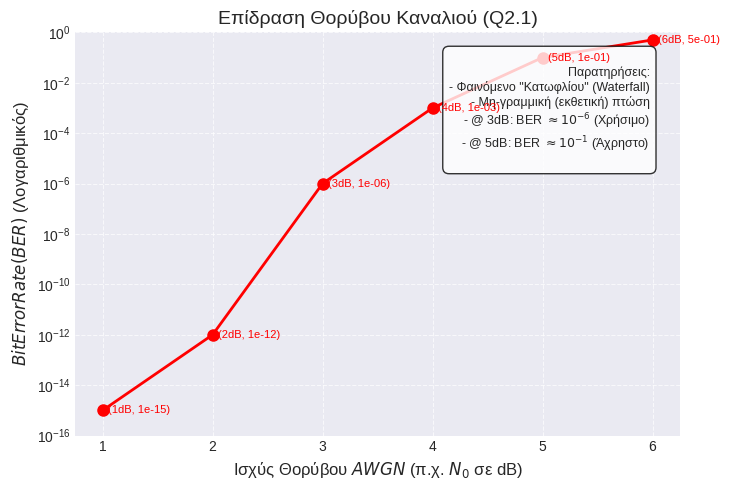

Δημιουργήθηκε το 'plot_bitrate_n.png'


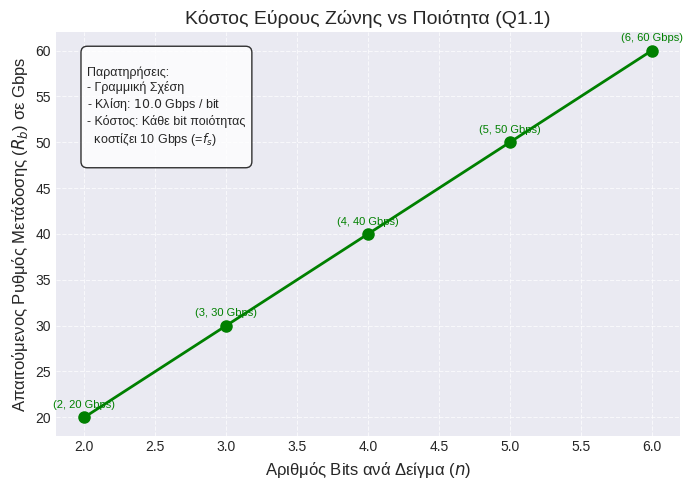

Δημιουργήθηκε το 'plot_bitrate_redundancy.png'


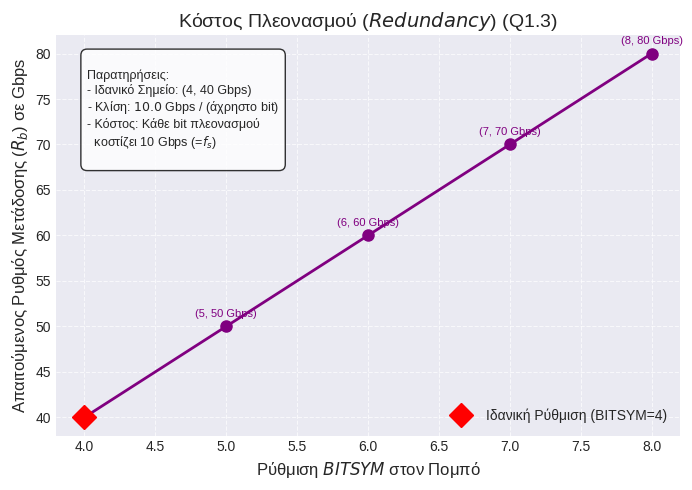


Ολοκληρώθηκε η δημιουργία 4 γραφικών παραστάσεων.
Κατεβάστε τα 4 αρχεία .png από τον File Explorer (εικονίδιο φακέλου) στα αριστερά και ανεβάστε τα στο Overleaf.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. Ρυθμίσεις Γραφικών Παραστάσεων ---

# ΔΙΟΡΘΩΣΗ 1: Το στυλ 'seaborn-darkgrid' έχει μετονομαστεί σε 'seaborn-v0_8-darkgrid'
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("Δημιουργία γραφικών παραστάσεων v12 (με σχολιασμό)...")

# ---------------------------------------------------------------------
# ΔΕΔΟΜΕΝΑ (Από Πίνακες 3 & 4 της αναφοράς)
# ---------------------------------------------------------------------

# Δεδομένα από Πίνακα 3 (SQNR vs n)
data_sqnr = {
    'n_bits': np.array([2, 3, 4, 5, 6]),
    'SQNR_dB': np.array([13.80, 19.82, 25.84, 31.86, 37.88]),
    'BitRate_Gbps': np.array([20, 30, 40, 50, 60]) # (fs = 10 Gsps)
}

# Δεδομένα από Πίνακα 4 (BER vs Noise)
data_ber = {
    'Noise_dB': np.array([1, 2, 3, 4, 5, 6]),
    'BER': np.array([1e-15, 1e-12, 1e-6, 1e-3, 1e-1, 0.5])
}

# Δεδομένα για Πλεονασμό (Q1.3)
data_redundancy = {
    'bitsym_setting': np.array([4, 5, 6, 7, 8]),
    'BitRate_Gbps': np.array([40, 50, 60, 70, 80]) # (n=4, fs=10)
}

# ---------------------------------------------------------------------
# Δημιουργία Plot 1: SQNR vs n (Γραμμική Σχέση)
# ---------------------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.plot(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 'o-', c='b', lw=2, markersize=8, label='Θεωρητικό SQNR')

# Υπολογισμός γραμμής 6dB/bit
fit = np.polyfit(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 1)
fit_fn = np.poly1d(fit)
slope = fit[0]
ax1.plot(data_sqnr['n_bits'], fit_fn(data_sqnr['n_bits']), 'r--', label=fr'Γραμμή Τάσης (Κλίση $\approx {slope:.2f}$ dB/bit)')

# ΔΙΟΡΘΩΣΗ 2: Χρήση 'raw strings' (r'...') για τις ετικέτες LaTeX
ax1.set_title(r'Ποιότητα Κβάντισης vs Bits Κωδικοποίησης (Q1.1)', fontsize=14)
ax1.set_xlabel(r'Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax1.set_ylabel(r'Λόγος $\mathit{SQNR}$ (dB)', fontsize=12)
ax1.legend(fontsize=10, loc='lower right')
ax1.grid(True, which='both', linestyle='--', alpha=0.7)

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
text_content = fr"""
Παρατηρήσεις:
- Σχέση: Γραμμική
- Υπολογ. Κλίση: ${slope:.2f}$ dB/bit
- Θεωρητική Κλίση: $\approx 6.02$ dB/bit
"""
# transform=ax1.transAxes σημαίνει ότι το (0.05, 0.95) είναι η πάνω αριστερή γωνία
ax1.text(0.05, 0.95, text_content, transform=ax1.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_sqnr['n_bits'], data_sqnr['SQNR_dB']):
    ax1.text(x, y - 0.9, f'({x}, {y:.2f})', ha='center', fontsize=8, color='b')

plt.tight_layout()
plt.savefig('plot_sqnr.png')
print("Δημιουργήθηκε το 'plot_sqnr.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 2: BER vs Noise (Λογαριθμική Σχέση - Waterfall)
# ---------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.semilogy(data_ber['Noise_dB'], data_ber['BER'], 'o-', c='r', lw=2, markersize=8)

ax2.set_title(r'Επίδραση Θορύβου Καναλιού (Q2.1)', fontsize=14)
ax2.set_xlabel(r'Ισχύς Θορύβου $\mathit{AWGN}$ (π.χ. $N_0$ σε dB)', fontsize=12)
ax2.set_ylabel(r'$\mathit{Bit Error Rate (BER)}$ (Λογαριθμικός)', fontsize=12)
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.set_ylim(1e-16, 1)
plt.tight_layout()

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
text_content = r"""
Παρατηρήσεις:
- Φαινόμενο "Κατωφλίου" (Waterfall)
- Μη-γραμμική (εκθετική) πτώση
- @ 3dB: BER $\approx 10^{-6}$ (Χρήσιμο)
- @ 5dB: BER $\approx 10^{-1}$ (Άχρηστο)
"""
ax2.text(0.95, 0.95, text_content, transform=ax2.transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_ber['Noise_dB'], data_ber['BER']):
    ax2.text(x + 0.05, y, f'({x}dB, {y:.0e})', ha='left', va='center', fontsize=8, color='r')

plt.savefig('plot_ber.png')
print("Δημιουργήθηκε το 'plot_ber.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 3: Bit Rate vs n (Το Κόστος της Ποιότητας)
# ---------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(7, 5))
ax3.plot(data_sqnr['n_bits'], data_sqnr['BitRate_Gbps'], 'o-', c='g', lw=2, markersize=8)

ax3.set_title(r'Κόστος Εύρους Ζώνης vs Ποιότητα (Q1.1)', fontsize=14)
ax3.set_xlabel(r'Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax3.set_ylabel(r'Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax3.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
slope = (data_sqnr['BitRate_Gbps'][-1] - data_sqnr['BitRate_Gbps'][0]) / (data_sqnr['n_bits'][-1] - data_sqnr['n_bits'][0])
text_content = fr"""
Παρατηρήσεις:
- Γραμμική Σχέση
- Κλίση: ${slope:.1f}$ Gbps / bit
- Κόστος: Κάθε bit ποιότητας
  κοστίζει 10 Gbps (=$f_s$)
"""
ax3.text(0.05, 0.95, text_content, transform=ax3.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_sqnr['n_bits'], data_sqnr['BitRate_Gbps']):
    ax3.text(x, y + 1, f'({x}, {y} Gbps)', ha='center', fontsize=8, color='g')

plt.savefig('plot_bitrate_n.png')
print("Δημιουργήθηκε το 'plot_bitrate_n.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 4: Bit Rate vs Redundancy (Το Κόστος του Πλεονασμού)
# ---------------------------------------------------------------------
fig4, ax4 = plt.subplots(figsize=(7, 5))
ax4.plot(data_redundancy['bitsym_setting'], data_redundancy['BitRate_Gbps'], 'o-', c='purple', lw=2, markersize=8)
ax4.plot(4, 40, 'D', c='red', markersize=12, label='Ιδανική Ρύθμιση (BITSYM=4)')

ax4.set_title(r'Κόστος Πλεονασμού ($\mathit{Redundancy}$) (Q1.3)', fontsize=14)
ax4.set_xlabel(r'Ρύθμιση $\mathit{BITSYM}$ στον Πομπό', fontsize=12)
ax4.set_ylabel(r'Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax4.legend(fontsize=10, loc='lower right')
ax4.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
slope = (data_redundancy['BitRate_Gbps'][-1] - data_redundancy['BitRate_Gbps'][0]) / (data_redundancy['bitsym_setting'][-1] - data_redundancy['bitsym_setting'][0])
text_content = fr"""
Παρατηρήσεις:
- Ιδανικό Σημείο: (4, 40 Gbps)
- Κλίση: ${slope:.1f}$ Gbps / (άχρηστο bit)
- Κόστος: Κάθε bit πλεονασμού
  κοστίζει 10 Gbps (=$f_s$)
"""
ax4.text(0.05, 0.95, text_content, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_redundancy['bitsym_setting'], data_redundancy['BitRate_Gbps']):
    if x != 4: # Μην βάλεις ετικέτα στο κόκκινο σημείο
        ax4.text(x, y + 1, f'({x}, {y} Gbps)', ha='center', fontsize=8, color='purple')

plt.savefig('plot_bitrate_redundancy.png')
print("Δημιουργήθηκε το 'plot_bitrate_redundancy.png'")
plt.show()

print("\nΟλοκληρώθηκε η δημιουργία 4 γραφικών παραστάσεων.")
print("Κατεβάστε τα 4 αρχεία .png από τον File Explorer (εικονίδιο φακέλου) στα αριστερά και ανεβάστε τα στο Overleaf.")

Δημιουργία γραφικών παραστάσεων v13 (με 5ο plot & νέα χρώματα)...
Δημιουργήθηκε το 'plot_sqnr.png'


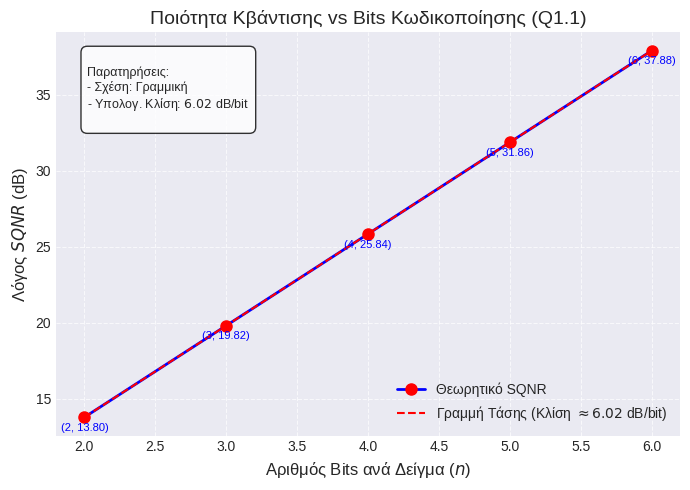

Δημιουργήθηκε το 'plot_ber.png'


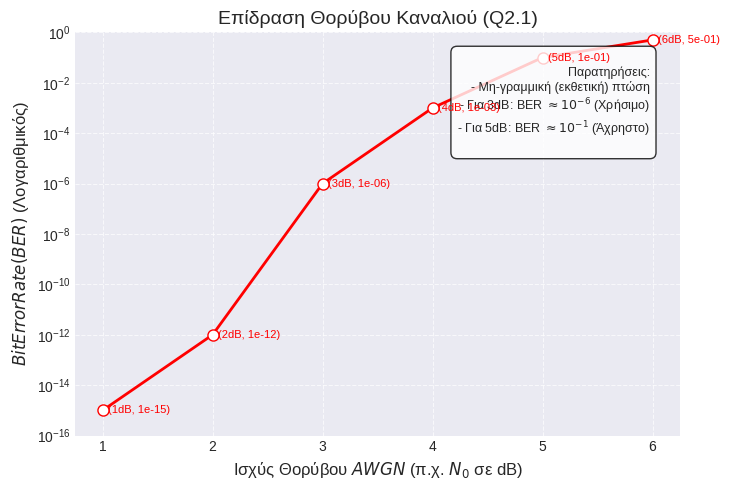

Δημιουργήθηκε το 'plot_bitrate_n.png'


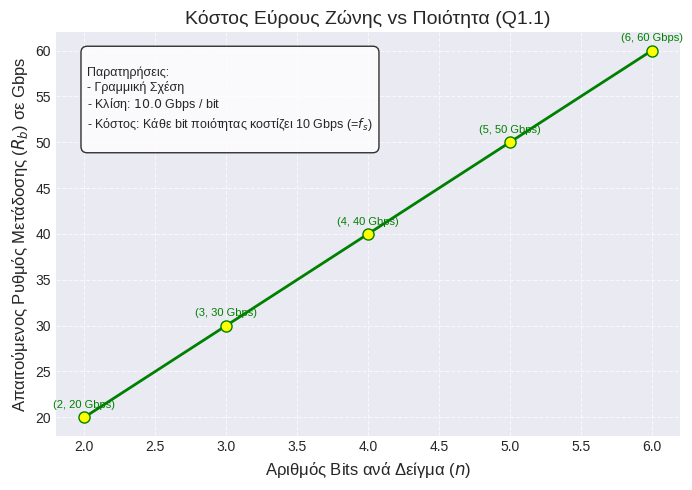

Δημιουργήθηκε το 'plot_bitrate_redundancy.png'


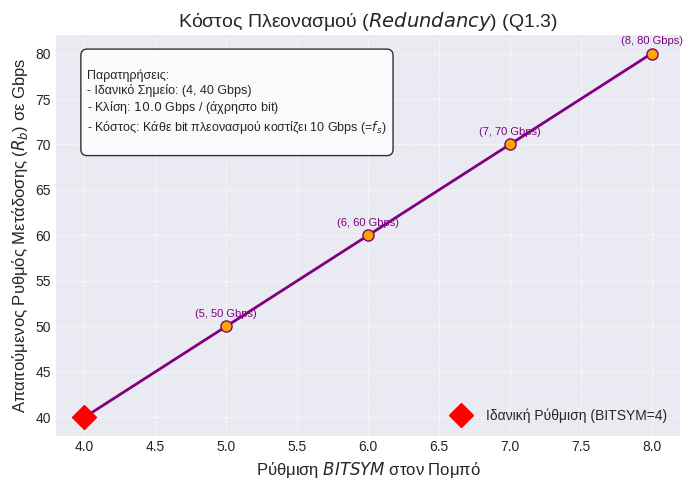

Δημιουργήθηκε το 'plot_bitsym_mismatch.png'


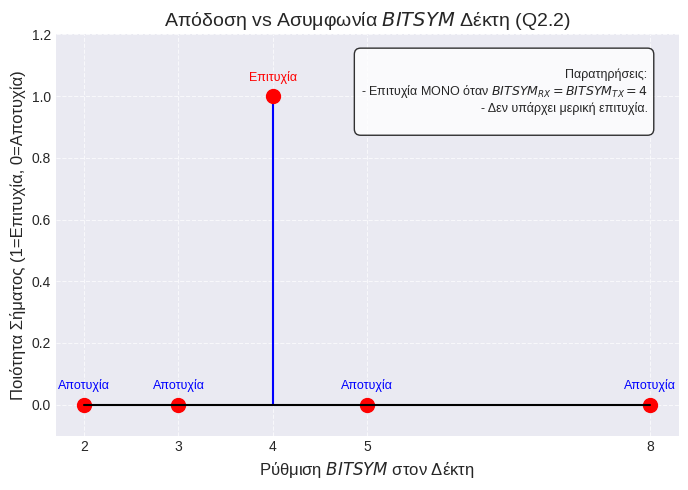


Ολοκληρώθηκε η δημιουργία 5 γραφικών παραστάσεων.
Κατεβάστε τα 5 αρχεία .png από τον File Explorer (εικονίδιο φακέλου) στα αριστερά και ανεβάστε τα στο Overleaf.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. Ρυθμίσεις Γραφικών Παραστάσεων ---
# ΔΙΟΡΘΩΣΗ 1: Το στυλ 'seaborn-darkgrid' έχει μετονομαστεί σε 'seaborn-v0_8-darkgrid'
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("Δημιουργία γραφικών παραστάσεων v13 (με 5ο plot & νέα χρώματα)...")

# ---------------------------------------------------------------------
# ΔΕΔΟΜΕΝΑ
# ---------------------------------------------------------------------

# Δεδομένα από Πίνακα (SQNR vs n)
data_sqnr = {
    'n_bits': np.array([2, 3, 4, 5, 6]),
    'SQNR_dB': np.array([13.80, 19.82, 25.84, 31.86, 37.88]),
    'BitRate_Gbps': np.array([20, 30, 40, 50, 60]) # (fs = 10 Gsps)
}

# Δεδομένα από Πίνακα (BER vs Noise)
data_ber = {
    'Noise_dB': np.array([1, 2, 3, 4, 5, 6]),
    'BER': np.array([1e-15, 1e-12, 1e-6, 1e-3, 1e-1, 0.5])
}

# Δεδομένα για Πλεονασμό (Q1.3)
data_redundancy = {
    'bitsym_setting': np.array([4, 5, 6, 7, 8]),
    'BitRate_Gbps': np.array([40, 50, 60, 70, 80]) # (n=4, fs=10)
}

# === v13: ΝΕΑ ΔΕΔΟΜΕΝΑ για Plot 5 (Q2.2) ===
data_bitsym_mismatch = {
    'bitsym_receiver': np.array([2, 3, 4, 5, 8]),
    'signal_quality': np.array([0, 0, 1, 0, 0]) # 0=Failure, 1=Success
}

# ---------------------------------------------------------------------
# Δημιουργία Plot 1: SQNR vs n (Γραμμική Σχέση)
# ---------------------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))

# === v13: ΑΛΛΑΓΗ ΧΡΩΜΑΤΟΣ ===
# Γραμμή: μπλε, Σημεία: κόκκινα
ax1.plot(data_sqnr['n_bits'], data_sqnr['SQNR_dB'],
         'o-', color='blue', mfc='red', mec='red', # mfc=markerfacecolor, mec=markeredgecolor
         lw=2, markersize=8, label='Θεωρητικό SQNR')

# Υπολογισμός γραμμής 6dB/bit
fit = np.polyfit(data_sqnr['n_bits'], data_sqnr['SQNR_dB'], 1)
fit_fn = np.poly1d(fit)
slope = fit[0]
ax1.plot(data_sqnr['n_bits'], fit_fn(data_sqnr['n_bits']), 'r--', label=fr'Γραμμή Τάσης (Κλίση $\approx {slope:.2f}$ dB/bit)')

# ΔΙΟΡΘΩΣΗ 2: Χρήση 'raw strings' (r'...') για τις ετικέτες LaTeX
ax1.set_title(r'Ποιότητα Κβάντισης vs Bits Κωδικοποίησης (Q1.1)', fontsize=14)
ax1.set_xlabel(r'Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax1.set_ylabel(r'Λόγος $\mathit{SQNR}$ (dB)', fontsize=12)
ax1.legend(fontsize=10, loc='lower right')
ax1.grid(True, which='both', linestyle='--', alpha=0.7)

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
text_content = fr"""
Παρατηρήσεις:
- Σχέση: Γραμμική
- Υπολογ. Κλίση: ${slope:.2f}$ dB/bit
"""
ax1.text(0.05, 0.95, text_content, transform=ax1.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_sqnr['n_bits'], data_sqnr['SQNR_dB']):
    ax1.text(x, y - 0.9, f'({x}, {y:.2f})', ha='center', fontsize=8, color='b')

plt.tight_layout()
plt.savefig('plot_sqnr.png')
print("Δημιουργήθηκε το 'plot_sqnr.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 2: BER vs Noise (Λογαριθμική Σχέση - Waterfall)
# ---------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(7, 5))

# === v13: ΑΛΛΑΓΗ ΧΡΩΜΑΤΟΣ ===
# Γραμμή: κόκκινη, Σημεία: λευκά με κόκκινο περίγραμμα
ax2.semilogy(data_ber['Noise_dB'], data_ber['BER'],
             'o-', color='red', mfc='white', mec='red',
             lw=2, markersize=8)

ax2.set_title(r'Επίδραση Θορύβου Καναλιού (Q2.1)', fontsize=14)
ax2.set_xlabel(r'Ισχύς Θορύβου $\mathit{AWGN}$ (π.χ. $N_0$ σε dB)', fontsize=12)
ax2.set_ylabel(r'$\mathit{Bit Error Rate (BER)}$ (Λογαριθμικός)', fontsize=12)
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.set_ylim(1e-16, 1)
plt.tight_layout()

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
text_content = r"""
Παρατηρήσεις:
- Μη-γραμμική (εκθετική) πτώση
- Για 3dB: BER $\approx 10^{-6}$ (Χρήσιμο)
- Για 5dB: BER $\approx 10^{-1}$ (Άχρηστο)
"""
ax2.text(0.95, 0.95, text_content, transform=ax2.transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_ber['Noise_dB'], data_ber['BER']):
    ax2.text(x + 0.05, y, f'({x}dB, {y:.0e})', ha='left', va='center', fontsize=8, color='r')

plt.savefig('plot_ber.png')
print("Δημιουργήθηκε το 'plot_ber.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 3: Bit Rate vs n (Το Κόστος της Ποιότητας)
# ---------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(7, 5))

# === v13: ΑΛΛΑΓΗ ΧΡΩΜΑΤΟΣ ===
# Γραμμή: πράσινη, Σημεία: κίτρινα
ax3.plot(data_sqnr['n_bits'], data_sqnr['BitRate_Gbps'],
         'o-', color='green', mfc='yellow', mec='green',
         lw=2, markersize=8)

ax3.set_title(r'Κόστος Εύρους Ζώνης vs Ποιότητα (Q1.1)', fontsize=14)
ax3.set_xlabel(r'Αριθμός Bits ανά Δείγμα ($n$)', fontsize=12)
ax3.set_ylabel(r'Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax3.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
slope = (data_sqnr['BitRate_Gbps'][-1] - data_sqnr['BitRate_Gbps'][0]) / (data_sqnr['n_bits'][-1] - data_sqnr['n_bits'][0])
text_content = fr"""
Παρατηρήσεις:
- Γραμμική Σχέση
- Κλίση: ${slope:.1f}$ Gbps / bit
- Κόστος: Κάθε bit ποιότητας κοστίζει 10 Gbps (=$f_s$)
"""
ax3.text(0.05, 0.95, text_content, transform=ax3.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_sqnr['n_bits'], data_sqnr['BitRate_Gbps']):
    ax3.text(x, y + 1, f'({x}, {y} Gbps)', ha='center', fontsize=8, color='g')

plt.savefig('plot_bitrate_n.png')
print("Δημιουργήθηκε το 'plot_bitrate_n.png'")
plt.show()

# ---------------------------------------------------------------------
# Δημιουργία Plot 4: Bit Rate vs Redundancy (Το Κόστος του Πλεονασμού)
# ---------------------------------------------------------------------
fig4, ax4 = plt.subplots(figsize=(7, 5))

# === v13: ΑΛΛΑΓΗ ΧΡΩΜΑΤΟΣ ===
# Γραμμή: μωβ, Σημεία: πορτοκαλί
ax4.plot(data_redundancy['bitsym_setting'], data_redundancy['BitRate_Gbps'],
         'o-', color='purple', mfc='orange', mec='purple',
         lw=2, markersize=8)
ax4.plot(4, 40, 'D', c='red', markersize=12, label='Ιδανική Ρύθμιση (BITSYM=4)')

ax4.set_title(r'Κόστος Πλεονασμού ($\mathit{Redundancy}$) (Q1.3)', fontsize=14)
ax4.set_xlabel(r'Ρύθμιση $\mathit{BITSYM}$ στον Πομπό', fontsize=12)
ax4.set_ylabel(r'Απαιτούμενος Ρυθμός Μετάδοσης ($R_b$) σε Gbps', fontsize=12)
ax4.legend(fontsize=10, loc='lower right')
ax4.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# === v12: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
slope = (data_redundancy['BitRate_Gbps'][-1] - data_redundancy['BitRate_Gbps'][0]) / (data_redundancy['bitsym_setting'][-1] - data_redundancy['bitsym_setting'][0])
text_content = fr"""
Παρατηρήσεις:
- Ιδανικό Σημείο: (4, 40 Gbps)
- Κλίση: ${slope:.1f}$ Gbps / (άχρηστο bit)
- Κόστος: Κάθε bit πλεονασμού κοστίζει 10 Gbps (=$f_s$)
"""
ax4.text(0.05, 0.95, text_content, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v12: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_redundancy['bitsym_setting'], data_redundancy['BitRate_Gbps']):
    if x != 4: # Μην βάλεις ετικέτα στο κόκκινο σημείο
        ax4.text(x, y + 1, f'({x}, {y} Gbps)', ha='center', fontsize=8, color='purple')

plt.savefig('plot_bitrate_redundancy.png')
print("Δημιουργήθηκε το 'plot_bitrate_redundancy.png'")
plt.show()

# ---------------------------------------------------------------------
# === v13: ΝΕΟ PLOT 5: BITSYM Mismatch (Q2.2) ===
# ---------------------------------------------------------------------
fig5, ax5 = plt.subplots(figsize=(7, 5))

# Χρήση stem plot (γράφημα ράβδων)
(markerline, stemlines, baseline) = ax5.stem(
    data_bitsym_mismatch['bitsym_receiver'],
    data_bitsym_mismatch['signal_quality'],
    linefmt='b-', markerfmt='ro', basefmt='k-'
)
# Προσαρμογή μεγέθους δεικτών
plt.setp(markerline, 'markersize', 10)

ax5.set_title(r'Απόδοση vs Ασυμφωνία $\mathit{BITSYM}$ Δέκτη (Q2.2)', fontsize=14)
ax5.set_xlabel(r'Ρύθμιση $\mathit{BITSYM}$ στον Δέκτη', fontsize=12)
ax5.set_ylabel(r'Ποιότητα Σήματος (1=Επιτυχία, 0=Αποτυχία)', fontsize=12)
ax5.grid(True, which='both', linestyle='--', alpha=0.7)
ax5.set_ylim(-0.1, 1.2)
ax5.set_xticks(data_bitsym_mismatch['bitsym_receiver']) # Εμφάνιση όλων των τιμών Χ

# === v13: ΠΡΟΣΘΗΚΗ BOX ΠΑΡΑΤΗΡΗΣΕΩΝ ===
text_content = r"""
Παρατηρήσεις:
- Επιτυχία ΜΟΝΟ όταν $\mathit{BITSYM}_{RX} = \mathit{BITSYM}_{TX} = 4$
- Δεν υπάρχει μερική επιτυχία.
"""
ax5.text(0.95, 0.95, text_content, transform=ax5.transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# === v13: ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΔΕΔΟΜΕΝΩΝ ===
for x, y in zip(data_bitsym_mismatch['bitsym_receiver'], data_bitsym_mismatch['signal_quality']):
    label = "Επιτυχία" if y == 1 else "Αποτυχία"
    ax5.text(x, y + 0.05, f'{label}', ha='center', fontsize=9, color='r' if y==1 else 'b')

plt.tight_layout()
plt.savefig('plot_bitsym_mismatch.png')
print("Δημιουργήθηκε το 'plot_bitsym_mismatch.png'")
plt.show()


print("\nΟλοκληρώθηκε η δημιουργία 5 γραφικών παραστάσεων.")
print("Κατεβάστε τα 5 αρχεία .png από τον File Explorer (εικονίδιο φακέλου) στα αριστερά και ανεβάστε τα στο Overleaf.")